${\bf \text{Pregunta 1}) }$

$ {\bf a)}$ (Recordatorio de Tarea 2) Sea $X_{i}\sim N(0,1) = Z_{i}$ (${\bf \text{normal estándar}}$) e $Y = \sum_{i=1}^{\nu} Z_{i}^{2}$, entonces $Y$ distribuye como ${\chi_{\nu}}^{2}$ con $\nu$ grados de libertad. Más explicítamente:

\begin{align}
  \sum_{i=1}^{\nu} {Z_{i}}^{2} \sim {\chi_{\nu}}^{2}
\end{align}

Para la t-student: sea $X \sim {\chi_{\nu}}^{2}$ y $Z\sim N(0,1)$, si definimos $t$ como:

\begin{align}
 t = \frac{Z} {\sqrt{\frac{x}{\nu}}}
\end{align}

es una t-student con $\nu$ grados de libertad.

Para la distribución $F$, desde $\text{Wolfram Alpha}$, la definimos como la razón entre  $X_n \sim {\chi_{n}}^{2}$ reducido y $X_m \sim {\chi_{m}^{2}}$, es decir:

\begin{align}
 F_{n,m} = \frac{\frac{X_{n}}{n}}{\frac{X_m}{m}}
\end{align}

Obviamente hay más relaciones pero todas son derivadas a partir de las definiciones ya descritas.

${\bf b)}$ Comencemos con la definición matemática del $bias$($sesgo$) de un estimador ($\hat{\theta}$) del parámetro $\theta$:

\begin{align}
 bias(\hat{\theta}) = \mathbb{E}[\hat{\theta}] - \theta
\end{align}

El $bias$ lo interpretamos como cuán lejos mi estimador está del valor real. Decimos que un estimador no tiene bias cuando $bias = 0$.

La varianza de del estimador $\hat{\theta}$ la definimos como:
\begin{align}
 \mathbb{V}(\hat{\theta}) = \mathbb{E}[(\hat{\theta} - \mathbb{E}[\hat{\theta}] )^2] = \mathbb{E}[{\hat{\theta}}^{2}] - \mathbb{E}[\hat{\theta}]^2
\end{align}

No es más que la medida de la dispersión de nuestro estimador ($\hat{\theta}$) alrededor del valor esperado del mismo  ($\mathbb{E}[\hat{\theta}]$) (esto en la teoría; en la práctica no es fácil conocer el valor esperado de nuestro estimador a priori).

Para ejemplificar esto, simularemos $m$ observaciones de $n$  puntos de una función definida ($A\sin(\theta)$) a la cual le estimaremos la amplitud $A$ usando un modelo de la forma $a + bx + c^2$ (polinomio de segundo grado), donde el estimador de la amplitud ($\hat{A}$) viene dado por $\hat{A} = a - \frac{b^2}{4 c}$; así calcularemos el valor $esperado$ y la varianza de nuestro estimador empírico. 


Altura: 1.95555831766


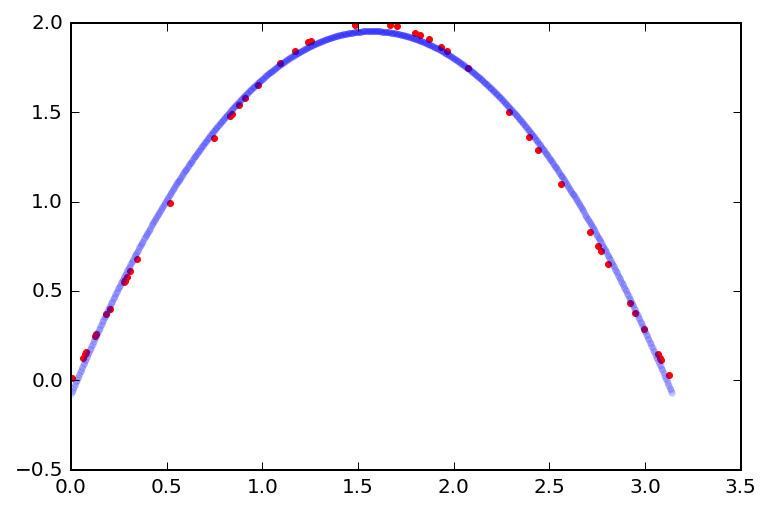

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import linalg
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#digamos que queremos modelar datos de la siguiente función

def sine (x):
    return 2*np.sin(x) 

def poly2 (A,B,C,x):
    return A + B*x + C*x**2.

#def sc (A,B,x):
#    return B*np.sin(3*x) + A

n = 50
x = np.random.uniform(0.,math.pi,n)
y = sine(x)
x0 = np.min(x)
xn = np.max(x)

M_pol2 = np.empty([n,3])
#M_sin = np.empty([n,2])

for i in range(n):
    M_pol2[i] = [1,x[i],x[i]**2]
    #M_sin[i] = [1,math.sin(2*x[i])]

#como no tengo una funcion para inversas de matrices no cuadradas... hagamos minimos cuadrados

pol2 = np.linalg.lstsq(M_pol2,y)
#print pol2
#sincos = np.linalg.lstsq(M_sin,y)
A = pol2[0][0]
B = pol2[0][1]
C = pol2[0][2]
h = A - B**2./(4.*C)

print 'Altura: %s' %h

x_func = np.linspace(0,math.pi,1000)
polinomio_y = poly2(A,B,C,x_func)
#sincos_y = sc(sincos[0][0],sincos[0][1],x_func)
 

plt.plot(x,y,'r.')
plt.plot(x_func,polinomio_y,'b.',alpha=0.1)
#plt.plot(x_func,sincos_y,'g.', alpha = 0.1)
plt.show()



1.96135492236 0.00713255054616


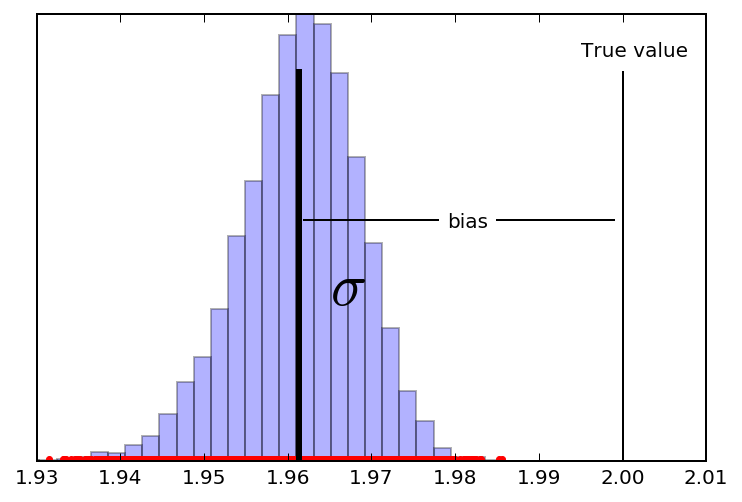

In [80]:
#para 10000 trials
trials = 10000
alturas = np.zeros(trials)
for j in range(trials):
    x = np.random.uniform(0.,math.pi,n)
    y = sine(x)
    M_pol2 = np.empty([n,3]) 
    for i in range(n):
        M_pol2[i] = [1,x[i],x[i]**2]
    pol2 = np.linalg.lstsq(M_pol2,y)
    A = pol2[0][0]
    B = pol2[0][1]
    C = pol2[0][2]
    h = A - (B**2.)/(4.*C)
    alturas[j] = h

plt.plot(alturas, 0.2*np.ones(trials), 'r.')  
plt.plot((2.,2.),(0.,50.),'k-')
plt.hist(alturas,30, normed = True, alpha=.3)
plt.xlim([1.93,2.01])
frame1 = plt.gca()
plt.text(1.995, 52, 'True value', fontsize=10)
frame1.axes.get_yaxis().set_ticks([])

mean = np.mean(alturas)
St = math.sqrt(np.sum(( alturas - mean)**2)/trials)
print mean, St
plt.plot((mean,mean),(0.,50.),'k-', linewidth=3.)
plt.text(1.979, 30, 'bias', fontsize=10)
plt.plot((1.962,1.978),(31.,31.),'k-')
plt.plot((1.985,1.999),(31.,31.),'k-')
plt.text(1.965,20,r'$\sigma$', fontsize=30, alpha=3.)
plt.show()

${\bf c)}$  El ${\bf MSE}$ o $\text{mean squared error}$ se define como:

\begin{align}
 MSE &= \mathbb{E}[(\theta - \hat{\theta}  )^2] \\
     &= \underbrace{bias({\hat{\theta}})^2 + \mathbb{V}(\hat{\theta})}_{\text{demostrado en clases}}
\end{align}

Y lo visualizamos como la $\text{distancia promedio}$ (en el sentido de la norma euclideana) entre el parámetro y el estimador (del gráfico anterior sería saber a priori el bias de cada estimador de los trials, calcular la $distancia$ al valor real[el cuadrado del bias] y promediar![aquí incorporamos la varianza!]).

${\bf d)}$ Debemos calcular el bias y la varianza de estos dos estimadores para calcular el MSE, ya que se dice que el que tenga menor MSE es el $mejor$ (aunque como vimos en ayudantía, esto no es necesariamente cierto; uno elije el estimador según lo que quiere estimar):

\begin{align}
 S^2 &= \frac{1}{n-1}\sum_{i}^{n} (X_{i} - \bar{X}) \\
 \hat{\sigma}^2 &= \frac{1}{n}\sum_{i}^{n} (X_{i} - \bar{X})
\end{align}

con $\bar{X}$ = $\frac{1}{n} \sum \limits_{i}^{n} X_{i}$. Comencemos con $S^2$:

\begin{align}
 \mathbb{E}[S^2] &= \mathbb{E}\left [\frac{\sigma^2}{n-1} \frac{n-1}{\sigma^2}S^2 \right ] \\
 \frac{\sigma^2}{n-1}\mathbb{E} \underbrace{\left [\frac{n-1}{\sigma^{2}} S^{2}\right ]}_{\text{Hint}} &= \left [\frac{\sigma^2}{n-1}\right ]\underbrace{\mathbb{E}[{\chi_{n-1}}^2]}_{ n-1 } \\
 \rightarrow  \mathbb{E}[S^2] &= \sigma^2  \text{          ($bias(S^2)=0$)} 
\end{align}

\begin{align}
\mathbb{V}[S^2] &= \mathbb{V} \left [ \frac{\sigma^2}{n-1} \frac{n-1}{\sigma^2}S^2  \right ]\\
\mathbb{V}[S^2] &= \frac{\sigma^4}{(n-1)^2} \underbrace{\mathbb{V}[\chi_{n-1}^2]}_{2(n-1)}\\
\rightarrow \mathbb{V}[S^2]&= \frac{2\sigma^4}{n-1}
\end{align}

Ahora para $\hat{\sigma}^{2}:$

\begin{align}
 \mathbb{E}[\hat{\sigma}^2] &= \mathbb{E}\left [\frac{\sigma^2}{n} \frac{n}{\sigma^2}\hat{\sigma}^2 \right ] \\
 \frac{\sigma^2}{n}\mathbb{E} \underbrace{\left [\frac{n}{\sigma^{2}} \hat{\sigma}^{2}\right ]}_{\text{Hint}} &= \left [\frac{\sigma^2}{n}\right ]\underbrace{\mathbb{E}[{\chi_{n-1}}^2]}_{ n-1 } \\
 \rightarrow  \mathbb{E}[\hat{\sigma}^2] &= \frac{n-1}{n}\sigma^2 \\   
 \rightarrow bias(\hat{\sigma}^2) &= -\frac{\sigma^2}{n}
\end{align}

\begin{align}
\mathbb{V}[\hat{\sigma}^2] &= \mathbb{V} \left [ \frac{\sigma^2}{n} \frac{n}{\sigma^2}\hat{\sigma}^2  \right ]\\
\mathbb{V}[\hat{\sigma}^2] &= \frac{\sigma^4}{n^2} \underbrace{\mathbb{V}[\chi_{n-1}^2]}_{2(n-1)}\\
\rightarrow \mathbb{V}[\hat{\sigma}^2]&= \frac{2\sigma^4(n-1)}{n^2}
\end{align}

Ahora calculemos los $MSE$ respectivos:

\begin{align}
 MSE[S^2] &= \frac{2\sigma^4}{n-1} \\
 MSE[\hat{\sigma}^2] &= \frac{2n-1}{n^2}\sigma^4
\end{align}

Claramente, si solo utilizamos el $MSE$ como medida de elección del estimador, tendríamos que elegir $\hat{\sigma}^2$. Como ya explicamos, esto depende de la situación; sabemos que este estimador tiene bias negativo, por lo cual subestima la varianza, lo cual es muy poco deseable.

${\bf e)}$ Recordemos la noción de $likelihood$: tenemos $n$ variables aleatorias $X_{1},X_{2}..X_{n}$ (a las cuales comúnmente llamos observaciones, samples, datos), iid (provienen de una distribución $f$), y supongamos que la distribución depende de una lista de parámetros, $\theta$ en singular; la pdf conjunta (es decir, que dado el parámetro $\theta$ queremos saber la probabilidad de los datos) se escribe como:

\begin{align}
p(X_1,X_2,..X_n | \theta) &=  p(X_1|\theta)p(X_2|\theta)..p(X_{n}|\theta )\\
&= \prod_{i}^{n} p(X_{i}|\theta)
\end{align}

Normalmente el $likelihood$ lo definimos como $\mathcal{L}(\theta) = \prod\limits_{i}^{n}p(X_{i}|\theta)$, pero es mucho más fácil, al querer obtener $\hat{\theta}$ que maximiza $\mathcal{\theta}$ (MLE), es más fácil hacerlo con el logaritmo del likelihood (${\bf \text{log-likelihood}}$):

\begin{align}
\text{log}(\mathcal{L}) = \sum_{i}^{n}p(X_{i}|\theta)
\end{align}

Por tanto, $\hat{\theta}$ cumple que:

\begin{align}
 \frac{d\text{log}(\mathcal{L})}{d\theta}\Bigr|_{\hat{\theta}} = 0
\end{align}

${\bf f)}$ Pasando al lado bayesiano, la distribución a posteriori se obtiene usando el Teorema de Bayes (usando las mismas definiciones de la respuesta anterior):

\begin{align}
 \underbrace{p(\theta|{X_1,X_2..X_{n}})}_{{\bf \text{a posteriori}}} = \frac{\overbrace{p(X_1,X_2..X_n|\theta)}^{{\bf \text{likelihood}}} \overbrace{p(\theta)}^{{\bf \text{a priori}}}}{ \underbrace{p(X_1,X_2..X_n)}_{{\bf \text{datos}}}}
\end{align}

${\bf g)}$ Tomando la  definición en f) para la distribución posterior, notamos que:

\begin{align}
 p(\theta|{X_1,X_2,..,X_n}) \propto p({X_1,X_2,..,X_n}|\theta)p(\theta)
\end{align}

El estimador MAP ($\tilde{\theta}$) es el que maximiza $p(\theta|{X_1,X_2,..,X_n})$, es decir;

\begin{align}
 \frac{d  p(\theta|{X_1,X_2,..,X_n}) }{d\theta} \Bigr|_{\tilde{\theta}} = 0
\end{align}

${\bf h)}$ Los tres estimadores se obtienen en razón a parámetros que $modelan$ un set de observaciones; el MAP coincide con el MLE cuando el ${\bf prior}$ del MAP es uniforme (constante); esto es, podemos pensar que el MLE es solo un caso particular del MAP; minimizar la suma de los cuadrados de los residuos es igual al maximizar el $likelihood$ (MLE) si los errores entre el $modelo$ y los datos distribuyen como $N(0,\sigma^2)$. Veamos esto último ya que es importante y es algo que me costó aprender:

Supongamos que tenemos observaciones, digamos ${Y_i,X_i}$, y queremos $fitear$ una curva, digamos, una recta, $ y= f(x) = \mathcal{A} x + \mathcal{B}$. Queremos obtener los $mejores$ $\mathcal{A}$ y $\mathcal{B}$ tal que la suma de los cuadrados de sus residuos ($S$):

\begin{align}
 S &= \sum_{i}^{n} (Y_{i} - y_i)^2\\
   &= \sum_{i}^n (Y_{i} - \mathcal{A} X_{i} - \mathcal{B})^2
\end{align}

sea mínimo, es decir, en este caso, minimizar $S$ con respecto a $\mathcal{A}$ y $\mathcal{B}$ $ \left ( \frac{dS}{d\mathcal{A}}\Bigr|_{\hat{\mathcal{A}}} = 0 \text{ y } \frac{dS}{d\mathcal{B}}\Bigr|_{\hat{\mathcal{B}}} = 0 \right )$.

Veamos ahora el problema desde el punto de vista probabilístico: tenemos nuestros datos ($Y_{i},X_{i}$), decimos que $Y|\{\mathcal{A},\mathcal{B}\} \sim \mathcal{A}X + \mathcal{B} + \epsilon $, con un pequeño error, $\epsilon$, tal que:

\begin{align}
 Y_{i} = \mathcal{A} X_{i} + \mathcal{B} + \epsilon_{i}  
\end{align}

con $\epsilon_{i} \sim N(0,\sigma^2)$ (${\bf \text{¡MUY IMPORTANTE!}}$). Usando la expresión anterior, podemos escribir nuestro $likelihood$ como (notando que $\mathbb{E}[Y_i|\{\mathcal{A},\mathcal{B}\}] =  \mathcal{A}X + \mathcal{B}$,  $\mathbb{V}[Y_i|\{\mathcal{A},\mathcal{B}\}]=\sigma^2$):

\begin{align}
 p(Y|{\mathcal{A,B}}) = \mathcal{L(A,B) } \propto \exp \left ( {-\frac{\sum\limits_{i}^{n} (Y_{i} - \mathcal{A}X - \mathcal{B}   )}{2\sigma^2} } \right )
\end{align}

Para encontrar el MLE, debemos entonces maximizar el likelihood (log-likelihood) con respecto a los parámetros $\mathcal{A}$ y $\mathcal{B}$, es decir, $\frac{\text{log} \mathcal{L}}{d\mathcal{A}} \Bigr|_{\hat{\mathcal{A}}} = 0$ y 
 $\frac{\text{log} \mathcal{L}}{d\mathcal{B}} \Bigr|_{\hat{\mathcal{B}}} = 0$, lo cual es idéntico a minimizar $S$, dado que $\epsilon_i \sim N(0,\sigma^2$).